<h2>Lab 2 </h2>
<h3>Part 2: word Embedding </h3>
<hr style="border:2px solid blue;">

<h3>Realised by:</h3>
<ul>
    <li><strong style="color:black;">ELMRABET HANAE</strong></li>
</ul>

<h3>Guided by:</h3> 
   <p><strong style="color:blue;">Pr . ELAACHAk LOTFy</strong></p>


#       Sommaire

1. [Import Librairies And Data Loading](#data-loading)
2. [preprocess data](#pre)
3. [Apply one hot encoding,](#hot-encoding)
4. [Apply bag of words](#part)
5. [Apply TF-IDF](#TF)
6. [Apply one Word2Vec](#2Vec)
    1. [Skip Gram](#skip)
    2. [CBOW](#cbow)
7. [Apply Glove](#glove)
8. [Apply FastText](#fsttext)
9. [Plot all the encoded / vectorized vectors](#plot)
10. [Conclusio](#concl)

## 1. Import Librairies And Data Loading<a id='data-loading'></a>

In [1]:
import pymongo
import nltk
import re
nltk.download('punkt')
import pandas as pd
from nltk.tokenize import sent_tokenize
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

[nltk_data] Downloading package punkt to C:\Users\pc
[nltk_data]     hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
client = pymongo.MongoClient("mongodb://localhost:27017")
db = client["scraping"]
collection = db["scraping1"]

In [3]:
cursor = collection.find()

In [4]:
data = list(cursor)

In [5]:
df = pd.DataFrame(data)

In [6]:
client.close()

In [7]:
df

_id                           titre propriété  \
0    6613405966cd235ae4b7116a  كوكيز‭ ‬رقائق‭ ‬الشوكولاتة‭...      سهلة   
1    6613405966cd235ae4b7116b                   كوكيز قوس قزح    متوسطة   
2    6613405966cd235ae4b7116c    كوكيز زبدة الفول السوداني...    متوسطة   
3    6613405966cd235ae4b7116d       كوكيز الشيكولاتة بالنعناع    متوسطة   
4    6613405966cd235ae4b7116e                   كوكيز البيتزا    متوسطة   
..                        ...                             ...       ...   
125  661342d2885a273d9393c2e2                        ليزي كيك      سهلة   
126  661342d2885a273d9393c2e3     فوندو الشوكولاتة مع الفواكه      سهلة   
127  661342d2885a273d9393c2e4          تارت الشوكولاتة بالتوت      سهلة   
128  661342d2885a273d9393c2e5          تيراميسو الشوكولاتة...    متوسطة   
129  661342d2885a273d9393c2e6   كيفية تحضير حليب الأزر الأبيض      سهلة   

                                           ingredients  \
0    \n\n\n\n 1/2 \n\n\nكوب الدقيق\n\n\n\n\n\n\n 1/...   
1    \n\n\n\n 1/2 \n\n\nكوب الدقيق\n\n\n\n\n\n\n 1/...   
2    \n\n\n\n 0 \n\n\nكوب نصف سكر\n\n\n\n\n\n\n 2 \...   
3    \n\n\n\n 0 \n\n\nكوب نصف سكر\n\n\n\n\n\n\n 2 \...   
4    \n\n\n\n 0 \n\n\nكوب سكر أبيض\n\n\n\n\n\n\n 0 ...   
..                                                 ...   
125  \n\n\n\n 2/3 \n\n\nكوب كريمة\n\n\n\n\n\n\n 120...   
126  \n\n\n\n 250 \n\n\nجم فتات كوكيز الشوكولاته\n\...   
127  \n\n\n\n 250 \n\n\nجم فتات كوكيز الشوكولاته\n\...   
128  \n\n\n\n 1 \n\n\nعلبة بسكويت المملح\n\n\n\n\n\...   
129  \n\n\n\n 1 \n\n\nعلبة بسكويت المملح\n\n\n\n\n\...   

                                              recettes  
0    \n\n\n1\n\nيُخلط‭ ‬نوعي‭ ‬الدقيق‭ ‬والبيكنج‭ ‬...  
1    \n\n\n1\n\nيخفق السكر البودرة مع السكر الأبيض ...  
2    \n\n\n1\n\nفي وعاء على النار يخلط السكر مع الش...  
3    \n\n\n1\n\nلعمل الكوكيز : تخلط كل المكونات الج...  
4    \n\n\n1\n\nلعمل الصوص : في وعاء متوسط العمق عل...  
..                                                 ...  
125  \n\n\n1\n\nيكسر البسكويت ويوضع في وعاء كبير.\n...  
126  \n\n\n1\n\nفي وعاء يحوي شوكولاتة، تضاف الكريمة...  
127  \n\n\n1\n\nيضرب الطحين والكاكاو والزبدة وسكر ا...  
128  \n\n\n1\n\nتخفق جبنة الماسكربون حتى تصبح ناعمة...  
129  \n\n\n1\n\nيغسل الأزر جيداً ويوضع في وعاء. يغم...  

[130 rows x 5 columns]

## 2. Preprocess data <a id='pre'></a>

In [8]:
# Fonction de nettoyage et de normalisation
def preprocess_arabic(text):
    # Normalize Arabic by removing diacritics
    text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)
    # Remove punctuations and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Tokenize and remove stop words
    stop_words = set(['من', 'على', 'مع', 'هذا', 'إلى', 'كل', 'في', 'و', 'أن'])
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Return the cleaned text
    return ' '.join(words)

# Applying the preprocessing function
df['cleaned_text'] = df['recettes'].apply(preprocess_arabic)

# Afficher les 10 premiers éléments du texte nettoyé
print("Texte nettoyé :")
print(df['cleaned_text'].head(10))


Texte nettoyé :
0    يخلط نوعي الدقيق والبيكنج صودا والملح وعاء يخف...
1    يخفق السكر البودرة السكر الأبيض الملح فى وعاء ...
2    وعاء النار يخلط السكر الشربات الخفيف زبدة الفو...
3    لعمل الكوكيز تخلط المكونات الجافة جيدا تخفق ال...
4    لعمل الصوص وعاء متوسط العمق النار يخلط السكر ا...
5    يخلط الطحين والقرفة والملح والسكر محضرة الطعام...
6    محضرة الطعام يضرب دقيق اللوز الباكينج صودا يضا...
7    تخلط المقادير معا يوزع الخليط أكواب ورقية حوال...
8    يغلى التمر والماء والسكر معا ثم تخفض درجة الحر...
9    وعاء خلاط كهربائي يوضع الزبد والدقيق والملح وا...
Name: cleaned_text, dtype: object


## 3. Apply one hot encoding,<a id='hot-encoding'></a>

In [9]:
# Identifier les colonnes textuelles
text_columns = [col for col in df.columns if df[col].dtype == 'object']

# Appliquer le nettoyage seulement sur les colonnes textuelles
for col in text_columns:
    df[f'cleaned_{col}'] = df[col].apply(
        lambda x: preprocess_arabic(x) if isinstance(x, str) else x
    )

print(df.head())


                        _id                           titre propriété  \
0  6613405966cd235ae4b7116a  كوكيز‭ ‬رقائق‭ ‬الشوكولاتة‭...      سهلة   
1  6613405966cd235ae4b7116b                   كوكيز قوس قزح    متوسطة   
2  6613405966cd235ae4b7116c    كوكيز زبدة الفول السوداني...    متوسطة   
3  6613405966cd235ae4b7116d       كوكيز الشيكولاتة بالنعناع    متوسطة   
4  6613405966cd235ae4b7116e                   كوكيز البيتزا    متوسطة   

                                         ingredients  \
0  \n\n\n\n 1/2 \n\n\nكوب الدقيق\n\n\n\n\n\n\n 1/...   
1  \n\n\n\n 1/2 \n\n\nكوب الدقيق\n\n\n\n\n\n\n 1/...   
2  \n\n\n\n 0 \n\n\nكوب نصف سكر\n\n\n\n\n\n\n 2 \...   
3  \n\n\n\n 0 \n\n\nكوب نصف سكر\n\n\n\n\n\n\n 2 \...   
4  \n\n\n\n 0 \n\n\nكوب سكر أبيض\n\n\n\n\n\n\n 0 ...   

                                            recettes  \
0  \n\n\n1\n\nيُخلط‭ ‬نوعي‭ ‬الدقيق‭ ‬والبيكنج‭ ‬...   
1  \n\n\n1\n\nيخفق السكر البودرة مع السكر الأبيض ...   
2  \n\n\n1\n\nفي وعاء على النار يخلط السكر مع الش...   


## 4. Apply bag of words<a id='part'></a>

In [10]:
# Créez un vectorisateur Bag of Words
vectorizer = CountVectorizer()
text_column = 'cleaned_recettes' 
if text_column in df.columns:
    bow = vectorizer.fit_transform(df[text_column])
    df_bow = pd.DataFrame(bow.toarray(), columns=vectorizer.get_feature_names_out())
    print("Bag of Words :")
    print(df_bow)
else:
    raise ValueError(f"La colonne '{text_column}' n'existe pas dans le DataFrame")

Bag of Words :
     disponibles  non  recettes  آخر  آي  آيس  أبيض  أثناء  أحد  أخر  ...  \
0              0    0         0    0   0    0     0      0    0    0  ...   
1              0    0         0    1   0    0     0      0    0    0  ...   
2              0    0         0    0   0    0     0      0    0    0  ...   
3              0    0         0    0   0    0     0      0    0    0  ...   
4              0    0         0    1   0    0     0      0    0    0  ...   
..           ...  ...       ...  ...  ..  ...   ...    ...  ...  ...  ...   
125            0    0         0    0   0    0     0      0    0    0  ...   
126            0    0         0    0   0    0     0      0    0    0  ...   
127            0    0         0    0   0    0     0      0    0    0  ...   
128            0    0         0    0   0    0     0      0    0    0  ...   
129            0    0         0    0   0    0     1      0    0    0  ...   

     ينعم  ينقع  ينقل  يهرس  يوزع  يوضع  يومين  یخلط  یرصف  

## 5. Apply TF-IDF<a id='TF'></a>

In [11]:
# Créez le vectorisateur TF-IDF
tfidf_vectorizer = TfidfVectorizer()
if text_column in df.columns:
    tfidf = tfidf_vectorizer.fit_transform(df[text_column])
    df_tfidf = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    print("TF-IDF :")
    print(df_tfidf)
else:
    raise ValueError(f"La colonne '{text_column}' n'existe pas dans le DataFrame")

TF-IDF :
     disponibles  non  recettes       آخر   آي  آيس      أبيض  أثناء  أحد  \
0            0.0  0.0       0.0  0.000000  0.0  0.0  0.000000    0.0  0.0   
1            0.0  0.0       0.0  0.082780  0.0  0.0  0.000000    0.0  0.0   
2            0.0  0.0       0.0  0.000000  0.0  0.0  0.000000    0.0  0.0   
3            0.0  0.0       0.0  0.000000  0.0  0.0  0.000000    0.0  0.0   
4            0.0  0.0       0.0  0.128971  0.0  0.0  0.000000    0.0  0.0   
..           ...  ...       ...       ...  ...  ...       ...    ...  ...   
125          0.0  0.0       0.0  0.000000  0.0  0.0  0.000000    0.0  0.0   
126          0.0  0.0       0.0  0.000000  0.0  0.0  0.000000    0.0  0.0   
127          0.0  0.0       0.0  0.000000  0.0  0.0  0.000000    0.0  0.0   
128          0.0  0.0       0.0  0.000000  0.0  0.0  0.000000    0.0  0.0   
129          0.0  0.0       0.0  0.000000  0.0  0.0  0.041162    0.0  0.0   

     أخر  ...  ينعم      ينقع  ينقل  يهرس      يوزع      يوضع     

## 6. Apply one Word2Vec <a id='2Vec'></a>

In [12]:
id_to_word = {i:x for (i, x) in enumerate(df['cleaned_recettes'])}
word_to_id = {x:i for (i, x) in enumerate(df['cleaned_recettes'])}
print(word_to_id)
print(id_to_word)

{'يخلط نوعي الدقيق والبيكنج صودا والملح وعاء يخفق الزبدة والسكر حتى يصبح الخليط كريميا يضاف البيض الواحدة تلو الأخرى الخلط حتى يختلط فقط يضاف خليط الدقيق والميوزلي واللوز والشوكولاتة والتمر ويخلط جيدا يغرف الخليط بواسطة مغرفة الآيس كريم صينية خبز مبطنة بورق الخبز ثم يوضع الثلاجة حتى يجمد لمدة دقيقة تقريبا تخبز الكوكيز فرن بدرجة حرارة مئوية لمدة دقيقة أو حتى تكتسب اللون الذهبي': 0, 'يخفق السكر البودرة السكر الأبيض الملح فى وعاء متوسط فى وعاء آخر يخفق البيض الفانيليا تخفق الزبدة بواسطة المضرب الكهربائي ثم يضاف اليها السكر ثم البيض يخلطوا جيدا يضاف الدقيق تدريجيا الخليط حتى يمتزج تماما تقسم العجينة كرات متوسطة الحجم كرات يضاف لون طعام عجينة تفرد العجينة السادة طبقة رفيعة سطح مستوي تفرد باقي العجينة بكل الألوان شكل اسطوانى ترص واحدة بجانب الأخرى تفرد بواسطة النشابة الألوان طبقة متساوية ثم تفرد العجينة السادة يلف العجين السادة عليها طبقة العجينة بالألوان اليمين اليسار حتى تصبح ذات شكل اسطوانى تدخل العجينة الثلاجه لمدة ساعة حتى ترتاح ثم ترفع تقطع حلقات ترص صينية الفرن تخبز درجة حرارة لمدة دق

In [13]:
def generate_training_data(cleaned_recettes, word_to_id, window_size):
    X, Y = [], []
    for i in range(len(cleaned_recettes)):
        nbr_inds = list(range(max(0, i - window_size), i)) + list(range(i + 1, min(len(df['cleaned_recettes']), i + window_size + 1)))
        for j in nbr_inds:
            X.append(word_to_id[cleaned_recettes[i]])
            Y.append(word_to_id[cleaned_recettes[j]])
    return np.array(X), np.array(Y)

x, y = generate_training_data(df['cleaned_recettes'], word_to_id, 3)
print(x)
print(y)
def expand_dims(x, y):
    x = np.expand_dims(x, axis=0)
    y = np.expand_dims(y, axis=0)
    return x, y
x, y = expand_dims(x, y)
print(x)
print(y)

[  0   0   0   1   1   1   1   2   2   2   2   2   3   3   3   3   3   3
   4   4   4   4   4   4   5   5   5   5   5   5   6   6   6   6   6   6
   7   7   7   7   7   7   8   8   8   8   8   8   9   9   9   9   9   9
  10  10  10  10  10  10  11  11  11  11  11  11  12  12  12  12  12  12
  13  13  13  13  13  13  14  14  14  14  14  14  15  15  15  15  15  15
  16  16  16  16  16  16  17  17  17  17  17  17  18  18  18  18  18  18
  19  19  19  19  19  19  20  20  20  20  20  20  21  21  21  21  21  21
  22  22  22  22  22  22  23  23  23  23  23  23  24  24  24  24  24  24
  25  25  25  25  25  25  26  26  26  26  26  26  27  27  27  27  27  27
  28  28  28  28  28  28  29  29  29  29  29  29  30  30  30  30  30  30
  31  31  31  31  31  31  32  32  32  32  32  32  33  33  33  33  33  33
  34  34  34  34  34  34  35  35  35  35  35  35  36  36  36  36  36  36
  37  37  37  37  37  37  38  38  38  38  38  38  39  39  39  39  39  39
  40  40  40  40  40  40  41  41  41  41  41  41  4

In [14]:
def init_parameters(vocab_size, emb_size):
    wrd_emb = np.random.randn(vocab_size, emb_size) * 0.01
    w = np.random.randn(vocab_size, emb_size) * 0.01
    return wrd_emb, w

def softmax(z):
    return np.divide(np.exp(z), np.sum(np.exp(z), axis=0, keepdims=True) + 0.001)

def forward(inds, params):
    wrd_emb, w = params
    word_vec = wrd_emb[inds.flatten(), :].T
    z = np.dot(w, word_vec)
    out = softmax(z)
    cache = inds, word_vec, w, z
    return out, cache
def cross_entropy(y, y_hat):
    m = y.shape[1]
    cost = -(1 / m) * np.sum(np.sum(y_hat * np.log(y + 0.001), axis=0, keepdims=True), axis=1)
    return cost
def dsoftmax(y, out):
    dl_dz = out - y
    return dl_dz
def backward(y, out, cache):
    inds, word_vec, w, z = cache
    wrd_emb, w = params
    dl_dz = dsoftmax(y, out)
    dl_dw = (1/word_vec.shape[1]) * np.dot(dl_dz, word_vec.T)
    dl_dword_vec = np.dot(w.T, dl_dz)
    return dl_dz, dl_dw, dl_dword_vec
def update(params, cache, grads, lr=0.03):
    inds, word_vec, w, z = cache
    wrd_emb, w = params
    dl_dz, dl_dw, dl_dword_vec = grads
    wrd_emb[inds.flatten(), :] -= dl_dword_vec.T * lr
    w -= dl_dw * lr
    return wrd_emb, w

In [15]:
vocab_size = len(id_to_word)
m = y.shape[1]
y_one_hot = np.zeros((vocab_size, m))
y_one_hot[y.flatten(), np.arange(m)] = 1
y = y_one_hot
batch_size=256
embed_size = 50
params = init_parameters(vocab_size, 50)
costs = []

In [16]:
for epoch in range(5000):
    epoch_cost = 0
    batch_inds = list(range(0, x.shape[1], batch_size))
    np.random.shuffle(batch_inds)
    for i in batch_inds:
        x_batch = x[:, i:i+batch_size]
        y_batch = y[:, i:i+batch_size]
        pred, cache = forward(x_batch, params)
        grads = backward(y_batch, pred, cache)
        params = update(params, cache, grads, 0.03)
        cost = cross_entropy(pred, y_batch)
        epoch_cost += np.squeeze(cost)
    costs.append(epoch_cost)
    if(epoch % 250 == 0):
        print("Cost after epoch {}: {}".format(epoch, epoch_cost))
ix = np.arange(0,5000)

Cost after epoch 0: 14.235846013160193
Cost after epoch 250: 14.203319739560865
Cost after epoch 500: 13.99394692617531
Cost after epoch 750: 12.57378269841289
Cost after epoch 1000: 8.533626551886666
Cost after epoch 1250: 6.927565671788447
Cost after epoch 1500: 6.5213741965700365
Cost after epoch 1750: 6.363713673850896
Cost after epoch 2000: 6.298289452391419
Cost after epoch 2250: 6.258737726538558
Cost after epoch 2500: 6.229683275018278
Cost after epoch 2750: 6.201839531400314
Cost after epoch 3000: 6.167747888243854
Cost after epoch 3250: 6.144597275350126
Cost after epoch 3500: 6.14158161201
Cost after epoch 3750: 6.150127617550538
Cost after epoch 4000: 6.1473914370073075
Cost after epoch 4250: 6.126920301562009
Cost after epoch 4500: 6.104285530363334
Cost after epoch 4750: 6.096959236953478


Text(0, 0.5, 'Losses')

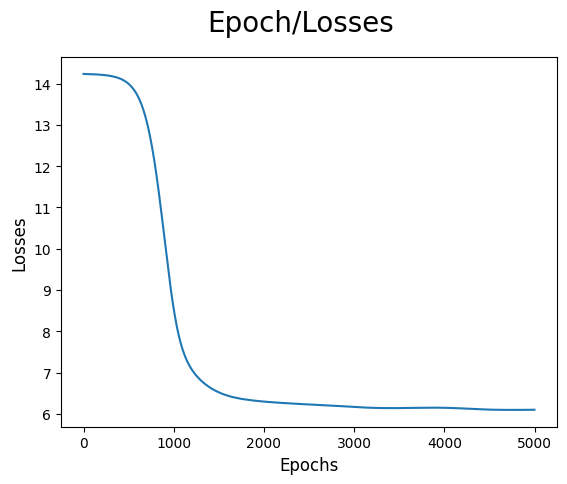

In [17]:
fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[costs[i] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [18]:
x_test = np.arange(vocab_size)
x_test = np.expand_dims(x_test, axis=0)
softmax_test, _ = forward(x_test, params)
top_sorted_inds = np.argsort(softmax_test, axis=0)[-4:,:]
for input_ind in range(vocab_size):
    input_word = id_to_word[input_ind]
    output_words = [id_to_word[output_ind] for output_ind in top_sorted_inds[::-1,
    input_ind]]
    print("{}'s skip-grams: {}".format(input_word, output_words))

يخلط نوعي الدقيق والبيكنج صودا والملح وعاء يخفق الزبدة والسكر حتى يصبح الخليط كريميا يضاف البيض الواحدة تلو الأخرى الخلط حتى يختلط فقط يضاف خليط الدقيق والميوزلي واللوز والشوكولاتة والتمر ويخلط جيدا يغرف الخليط بواسطة مغرفة الآيس كريم صينية خبز مبطنة بورق الخبز ثم يوضع الثلاجة حتى يجمد لمدة دقيقة تقريبا تخبز الكوكيز فرن بدرجة حرارة مئوية لمدة دقيقة أو حتى تكتسب اللون الذهبي's skip-grams: ['لعمل الكوكيز تخلط المكونات الجافة جيدا تخفق الزبدة السكر الأبيض البني حتى تصبح ذات قوام ناعم يضاف إليها البيض الفانيليا تخلط جيدا ثم يضاف الخليط الجاف تدريجيا حتى تمتزج المكونات ترفع بواسطة ملعقة الآيس كريم ترص صينية الفرن عليها ورق زبدة تخبز لمدة الى دقيقة درجة حرارة ثم ترفع تترك لتبرد تماما لتجهيز كريمة الزبدة يخفق السكر البودرة الزبدة جيدا ثم تضاف إليه الفانيليا الكريمة حتى الحصول القوام المطلوب يضاف إليها اللون الأخضر تخلط جيدا ثم توضع الكوكيز الباردة تذاب قطع الشيكولاته الغامقة الميكرويف ثم ترفع كيس حلواني تزين بها الكوكيز بكريمة الزبدة الخضراء', 'وعاء النار يخلط السكر الشربات الخفيف زبدة الفول 

### 6.1 apply cbow <a id='cbow'></a>

In [19]:
text = " ".join(df['cleaned_recettes'])
words = text.split()
vocab = set(words)
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [20]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:20])

[(['يخلط', 'نوعي', 'والبيكنج', 'صودا'], 'الدقيق'), (['نوعي', 'الدقيق', 'صودا', 'والملح'], 'والبيكنج'), (['الدقيق', 'والبيكنج', 'والملح', 'وعاء'], 'صودا'), (['والبيكنج', 'صودا', 'وعاء', 'يخفق'], 'والملح'), (['صودا', 'والملح', 'يخفق', 'الزبدة'], 'وعاء'), (['والملح', 'وعاء', 'الزبدة', 'والسكر'], 'يخفق'), (['وعاء', 'يخفق', 'والسكر', 'حتى'], 'الزبدة'), (['يخفق', 'الزبدة', 'حتى', 'يصبح'], 'والسكر'), (['الزبدة', 'والسكر', 'يصبح', 'الخليط'], 'حتى'), (['والسكر', 'حتى', 'الخليط', 'كريميا'], 'يصبح'), (['حتى', 'يصبح', 'كريميا', 'يضاف'], 'الخليط'), (['يصبح', 'الخليط', 'يضاف', 'البيض'], 'كريميا'), (['الخليط', 'كريميا', 'البيض', 'الواحدة'], 'يضاف'), (['كريميا', 'يضاف', 'الواحدة', 'تلو'], 'البيض'), (['يضاف', 'البيض', 'تلو', 'الأخرى'], 'الواحدة'), (['البيض', 'الواحدة', 'الأخرى', 'الخلط'], 'تلو'), (['الواحدة', 'تلو', 'الخلط', 'حتى'], 'الأخرى'), (['تلو', 'الأخرى', 'حتى', 'يختلط'], 'الخلط'), (['الأخرى', 'الخلط', 'يختلط', 'فقط'], 'حتى'), (['الخلط', 'حتى', 'فقط', 'يضاف'], 'يختلط')]


In [21]:
# embedings
embeddings = np.random.random_sample((vocab_size, embed_dim))

In [22]:
def linear(m, theta):
    w = theta
    return m.dot(w)

# log softmax
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

def log_softmax_crossentropy_with_logits(logits,target):
    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- out + softmax) / logits.shape[0]

def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    return m, n, o

def backward(preds, theta, target_idxs):
    m, n, o = preds
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    return dw

def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [23]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

epoch_losses = {}

for epoch in range(80):
    losses = []
    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)
        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)
        losses.append(loss)
        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
    
    epoch_losses[epoch] = losses
    
ix = np.arange(0,80)

Text(0, 0.5, 'Losses')

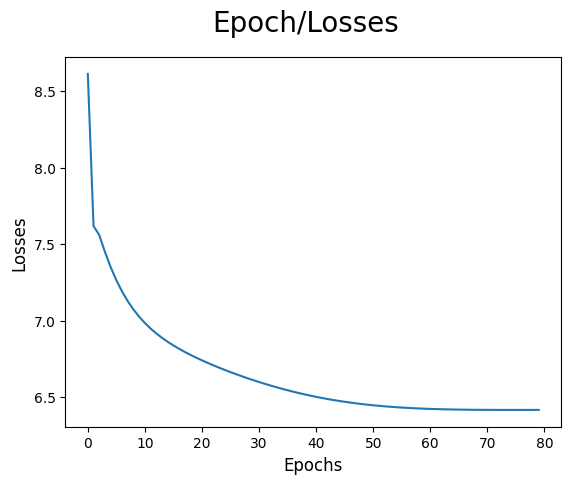

In [25]:
fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

## 7. Apply Glove <a id='glove'></a>

In [ ]:
# Download and load the GloVe model
#glove_model = api.load("glove-wiki-gigaword-100")

In [ ]:
"""
def compute_glove_embedding(text):
    tokens = text.split()
    embeddings = []
    for token in tokens:
        if token in glove_model:
            embeddings.append(glove_model[token])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(glove_model.vector_size)  
"""

In [57]:
"""
df['glove_embedding'] = df['cleaned_recettes'].apply(compute_glove_embedding)
print(df)
"""

"\ndf['glove_embedding'] = df['cleaned_recettes'].apply(compute_glove_embedding)\nprint(df)\n"

## 8. Apply FastText <a id='fasttext'></a>


## 9. Plot all the encoded / vectorized vectors <a id='plot'></a>

In [41]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identifier les colonnes à encoder
cleaned_text_columns = [f'cleaned_{col}' for col in text_columns]

# Initialiser le One-Hot Encoder avec le bon argument
encoder = OneHotEncoder(sparse_output=False)  # Remplacez 'sparse' par 'sparse_output'

# Appliquer le One-Hot Encoding sur les colonnes nettoyées
encoded_data = encoder.fit_transform(df[cleaned_text_columns])

# Obtenir les noms des colonnes encodées
encoded_columns = encoder.get_feature_names_out(cleaned_text_columns)

# Créer le DataFrame avec les données encodées
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns)



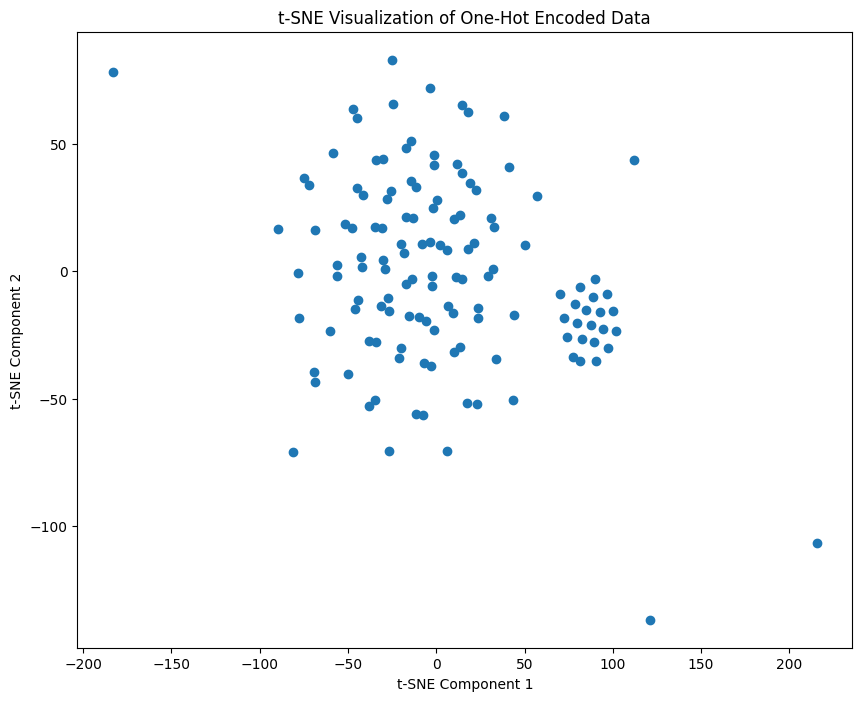

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Appliquer t-SNE pour réduire les dimensions à 2D
tsne = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200)  # Ajustez les paramètres si nécessaire
tsne_results = tsne.fit_transform(df_encoded)

# Visualisation avec Matplotlib
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title("t-SNE Visualization of One-Hot Encoded Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [43]:

word_frequencies = df_bow.sum()
word_frequencies_sorted = word_frequencies.sort_values(ascending=False)

print("Fréquences des mots :")
print(word_frequencies_sorted.head(10))  


Fréquences des mots :
حتى       247
ثم        246
لمدة      163
يضاف      120
الخليط     94
دقيقة      93
وعاء       91
يوضع       83
توضع       81
دقائق      74
dtype: int64


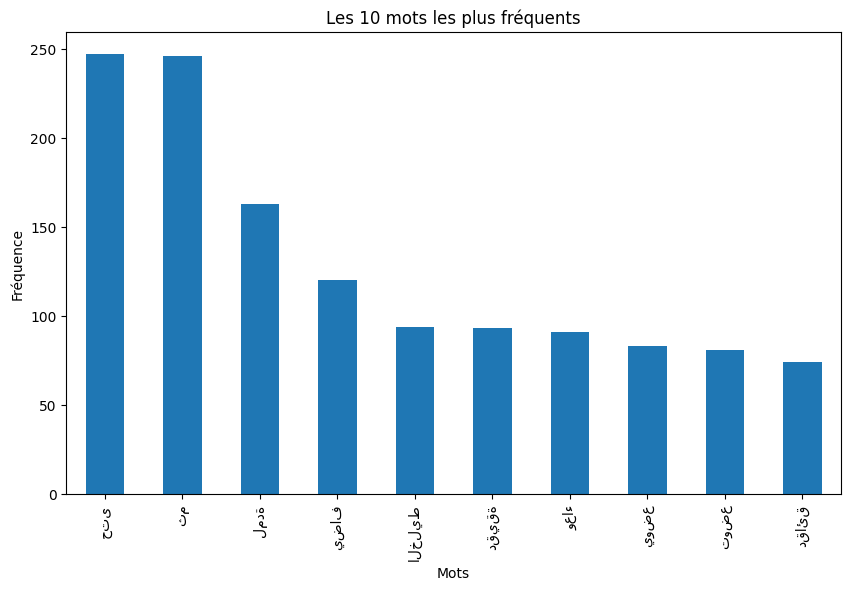

In [44]:

word_frequencies_sorted.head(10).plot(kind='bar', figsize=(10, 6))
plt.title("Les 10 mots les plus fréquents")
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.show()


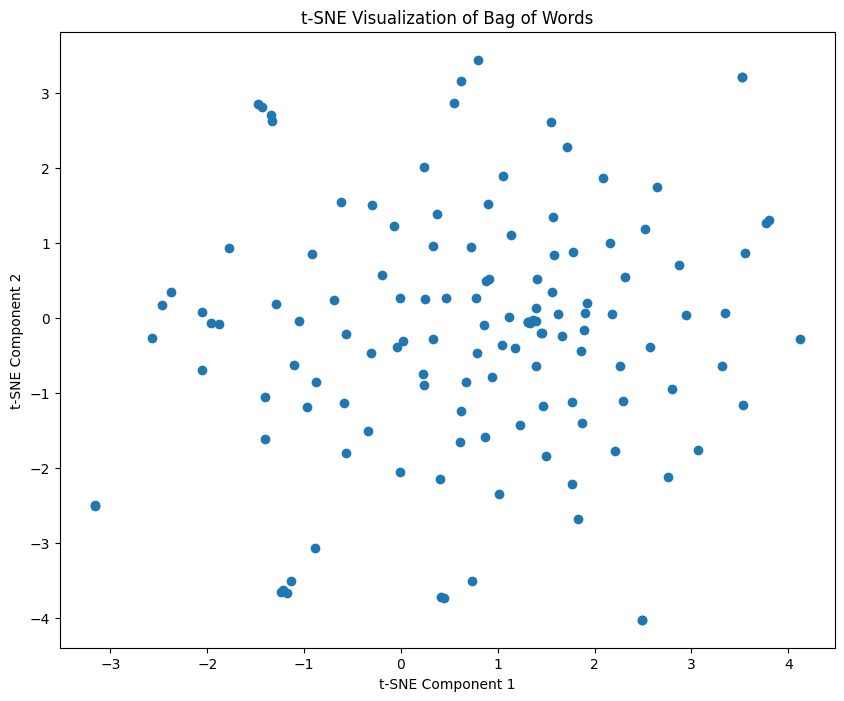

In [45]:
# Appliquer t-SNE sur le DataFrame BoW
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(df_bow)
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title("t-SNE Visualization of Bag of Words")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

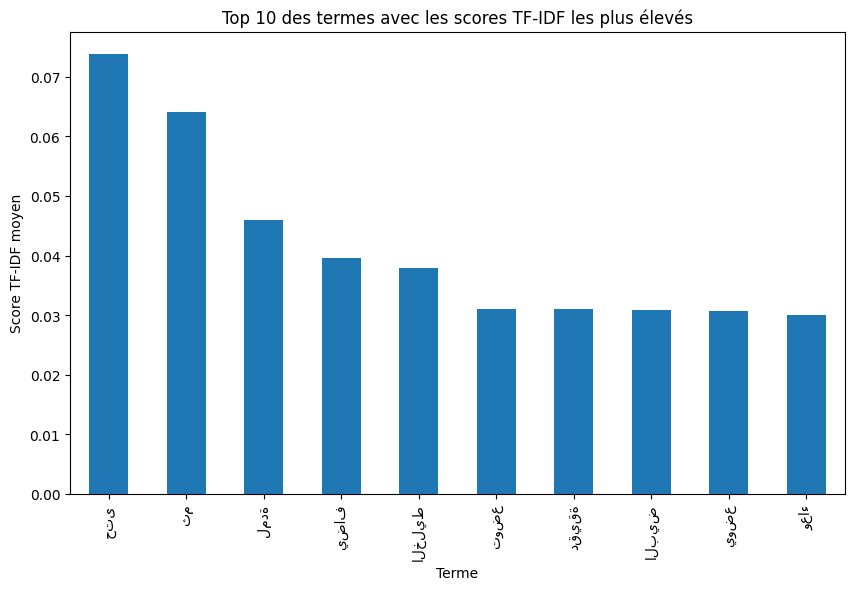

In [46]:


# Obtenir les scores moyens des colonnes TF-IDF
tfidf_scores = df_tfidf.mean()

# Graphique à barres des scores TF-IDF les plus élevés
tfidf_scores.nlargest(10).plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 des termes avec les scores TF-IDF les plus élevés")
plt.xlabel("Terme")
plt.ylabel("Score TF-IDF moyen")
plt.show()


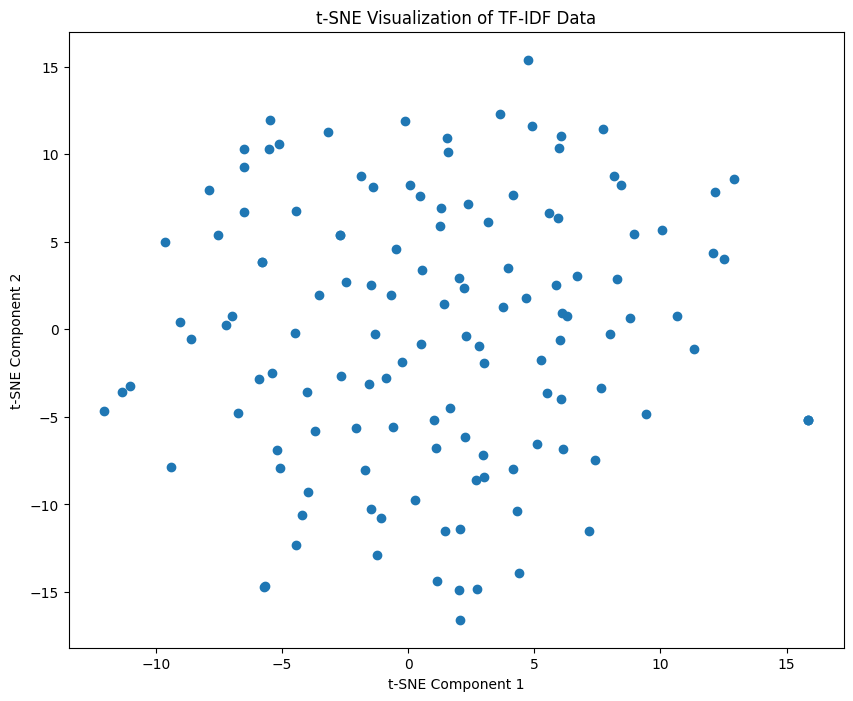

In [47]:


# Appliquer t-SNE pour réduire les dimensions à 2D
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(df_tfidf)

# Visualisation avec Matplotlib
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title("t-SNE Visualization of TF-IDF Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


## 10. Conclusion <a id='Concl'></a>

<p>In this lab, we explored various Natural Language Processing (NLP) techniques, covering both traditional rule-based methods and modern word embedding approaches.

We started by leveraging regular expressions (Regex) to extract specific information from unstructured text. Using Regex, we successfully generated structured content, like a bill, from raw text data, demonstrating the effectiveness of rule-based parsing in certain NLP tasks.

Next, we transitioned to advanced word embedding techniques. These methods convert text into numerical vectors, making them suitable for machine learning applications. We applied several common techniques, including one-hot encoding, TF-IDF (Term Frequency-Inverse Document Frequency), and word embeddings like Word2Vec (in both Skip Gram and CBOW configurations), GloVe, and FastText.

To visualize these encoded vectors, we utilized the t-SNE algorithm, which allowed us to observe the distribution of the vectors in a lower-dimensional space. This visualization helped us evaluate the effectiveness of the different embedding methods in capturing relationships between words and contextual information.

We also emphasized the importance of text preprocessing. A key step in NLP, preprocessing functions—like cleaning Arabic text—ensure data quality and consistency, contributing to the overall success of NLP tasks.

Overall, the lab provided a comprehensive overview of NLP techniques, equipping us with practical skills for text analysis and processing. Through hands-on exercises, we gained valuable experience in extracting information, embedding text, and visualizing data in meaningful ways.</p>